In [1]:
import pandas as pd
import xlrd
import cleaning_functions as clean

In [2]:
df = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

In [3]:
# Removing unnecessary columns, selecting Florida data, standardizing column name
df_florida = clean.trim_dataset(df) 
df_florida.head()

,date,type,location,activity,sex,age,injury,time,species
0,2024-10-11 00:00:00,Unprovoked,Brevard County Orlando,Surfing,M,16,Bite to left arm,?,Bull shark 6ft
1,2024-07-08 00:00:00,Unprovoked,Ponce de Leon Inlet Volusia County,Diving into Water,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark
2,2024-07-05 00:00:00,Unprovoked,New Smyrna Beach,Wading,M,26,Minor injury to left foot,16hr15,Not specified
3,2024-07-04 00:00:00,Unprovoked,New Smyrna Beach Beach Access 14 Volusia County,Swimming,M,NaN,Bite to left leg,1100hr,6ft shark
4,2024-06-07 00:00:00,Unprovoked,Rosemary Beach Walton County,Swimming,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect


In [4]:
#Convert everything in the activity column to string and strip any trailing whitespace
df_florida['activity'] = clean.standardize_string(df_florida['activity']) 
#Standardize and classify the activities
df_florida['activity'] = df_florida['activity'].apply(clean.standardize_activity)
df_florida['activity'].head()

0     surfing
1      diving
2      wading
3    swimming
4    swimming
Name: activity, dtype: object

In [5]:
#Convert everything in the type column to string and strip any trailing whitespace
df_florida['type'] = clean.standardize_string(df_florida['type'])
#Standardize and classify the types of attacks
df_florida['type'] = df_florida['type'].apply(clean.standardize_type)
df_florida['type'].head()

0    unprovoked
1    unprovoked
2    unprovoked
3    unprovoked
4    unprovoked
Name: type, dtype: object

In [6]:
#Convert everything in the location column to string and strip any trailing whitespace
df_florida['location'] = clean.standardize_string(df_florida['location'])
#Standardize and classify the locations and separate them into precise_location and county column
df_florida = clean.get_county_from_location(df_florida)
df_florida.head()

,date,type,location,activity,sex,age,injury,time,species,precise_location,county
0,2024-10-11 00:00:00,unprovoked,brevard county orlando,surfing,M,16,Bite to left arm,?,Bull shark 6ft,other,brevard county
1,2024-07-08 00:00:00,unprovoked,ponce de leon inlet volusia county,diving,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark,other,volusia county
2,2024-07-05 00:00:00,unprovoked,new smyrna beach,wading,M,26,Minor injury to left foot,16hr15,Not specified,new smyrna beach,volusia county
3,2024-07-04 00:00:00,unprovoked,new smyrna beach beach access 14 volusia county,swimming,M,NaN,Bite to left leg,1100hr,6ft shark,new smyrna beach,volusia county
4,2024-06-07 00:00:00,unprovoked,rosemary beach walton county,swimming,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,other,other


In [7]:
#Cleaning for sex column
df_florida["sex"] = df_florida["sex"].apply(clean.clear_sex)
#Forward filling the nan values in age
df_florida["age"] = df_florida['age'].ffill()
#Removing trailing whitespace and converting to float
df_florida["age"] = df_florida["age"].astype(str).str.extract(r'(\d+)').astype(float)
#Adding age_group column to classify people's in age categories
df_florida['age_group'] = df_florida['age'].apply(clean.categorize_age)
df_florida.head()

,date,type,location,activity,sex,age,injury,time,species,precise_location,county,age_group
0,2024-10-11 00:00:00,unprovoked,brevard county orlando,surfing,M,16.0,Bite to left arm,?,Bull shark 6ft,other,brevard county,Teens
1,2024-07-08 00:00:00,unprovoked,ponce de leon inlet volusia county,diving,M,14.0,Lower left leg injury,11hr15,4-5ft Blacktip shark,other,volusia county,Teens
2,2024-07-05 00:00:00,unprovoked,new smyrna beach,wading,M,26.0,Minor injury to left foot,16hr15,Not specified,new smyrna beach,volusia county,Adult
3,2024-07-04 00:00:00,unprovoked,new smyrna beach beach access 14 volusia county,swimming,M,26.0,Bite to left leg,1100hr,6ft shark,new smyrna beach,volusia county,Adult
4,2024-06-07 00:00:00,unprovoked,rosemary beach walton county,swimming,F,45.0,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,other,other,Adult


In [8]:
#Standardizing date format
df_florida['date'] = df_florida['date'].astype(str).apply(clean.clean_date_prefix)
df_florida['date'] = pd.to_datetime(df_florida['date'], format='mixed', dayfirst=True, errors='coerce')
df_florida.head()

,date,type,location,activity,sex,age,injury,time,species,precise_location,county,age_group
0,2024-10-11,unprovoked,brevard county orlando,surfing,M,16.0,Bite to left arm,?,Bull shark 6ft,other,brevard county,Teens
1,2024-07-08,unprovoked,ponce de leon inlet volusia county,diving,M,14.0,Lower left leg injury,11hr15,4-5ft Blacktip shark,other,volusia county,Teens
2,2024-07-05,unprovoked,new smyrna beach,wading,M,26.0,Minor injury to left foot,16hr15,Not specified,new smyrna beach,volusia county,Adult
3,2024-07-04,unprovoked,new smyrna beach beach access 14 volusia county,swimming,M,26.0,Bite to left leg,1100hr,6ft shark,new smyrna beach,volusia county,Adult
4,2024-06-07,unprovoked,rosemary beach walton county,swimming,F,45.0,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,other,other,Adult


In [9]:
#Standardizing and classifying time
df_florida = clean.clean_and_standardize_time(df_florida, "time")
df_florida.head()

,date,type,location,activity,sex,age,injury,time,species,precise_location,county,age_group
0,2024-10-11,unprovoked,brevard county orlando,surfing,M,16.0,Bite to left arm,unknown,Bull shark 6ft,other,brevard county,Teens
1,2024-07-08,unprovoked,ponce de leon inlet volusia county,diving,M,14.0,Lower left leg injury,unknown,4-5ft Blacktip shark,other,volusia county,Teens
2,2024-07-05,unprovoked,new smyrna beach,wading,M,26.0,Minor injury to left foot,morning,Not specified,new smyrna beach,volusia county,Adult
3,2024-07-04,unprovoked,new smyrna beach beach access 14 volusia county,swimming,M,26.0,Bite to left leg,afternoon,6ft shark,new smyrna beach,volusia county,Adult
4,2024-06-07,unprovoked,rosemary beach walton county,swimming,F,45.0,Significant injuries to pelvic and abdominal r...,morning,Not specified Bull shark highly suspect,other,other,Adult


In [10]:
#Renaming the species column to shark size
df_florida.rename(columns={'species': 'shark size'}, inplace=True)
#Standardize the species names before classification
df_florida['shark size'] = clean.standardize_string(df_florida['shark size'])
# Apply the size classification function to the 'shark size' column
df_florida['shark size'] = df_florida['shark size'].apply(clean.classify_size)
df_florida.head()

,date,type,location,activity,sex,age,injury,time,shark size,precise_location,county,age_group
0,2024-10-11,unprovoked,brevard county orlando,surfing,M,16.0,Bite to left arm,unknown,medium,other,brevard county,Teens
1,2024-07-08,unprovoked,ponce de leon inlet volusia county,diving,M,14.0,Lower left leg injury,unknown,small,other,volusia county,Teens
2,2024-07-05,unprovoked,new smyrna beach,wading,M,26.0,Minor injury to left foot,morning,unknown,new smyrna beach,volusia county,Adult
3,2024-07-04,unprovoked,new smyrna beach beach access 14 volusia county,swimming,M,26.0,Bite to left leg,afternoon,medium,new smyrna beach,volusia county,Adult
4,2024-06-07,unprovoked,rosemary beach walton county,swimming,F,45.0,Significant injuries to pelvic and abdominal r...,morning,unknown,other,other,Adult


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\VDaub\AppData\Local\Temp\ipykernel_6604\1526551154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


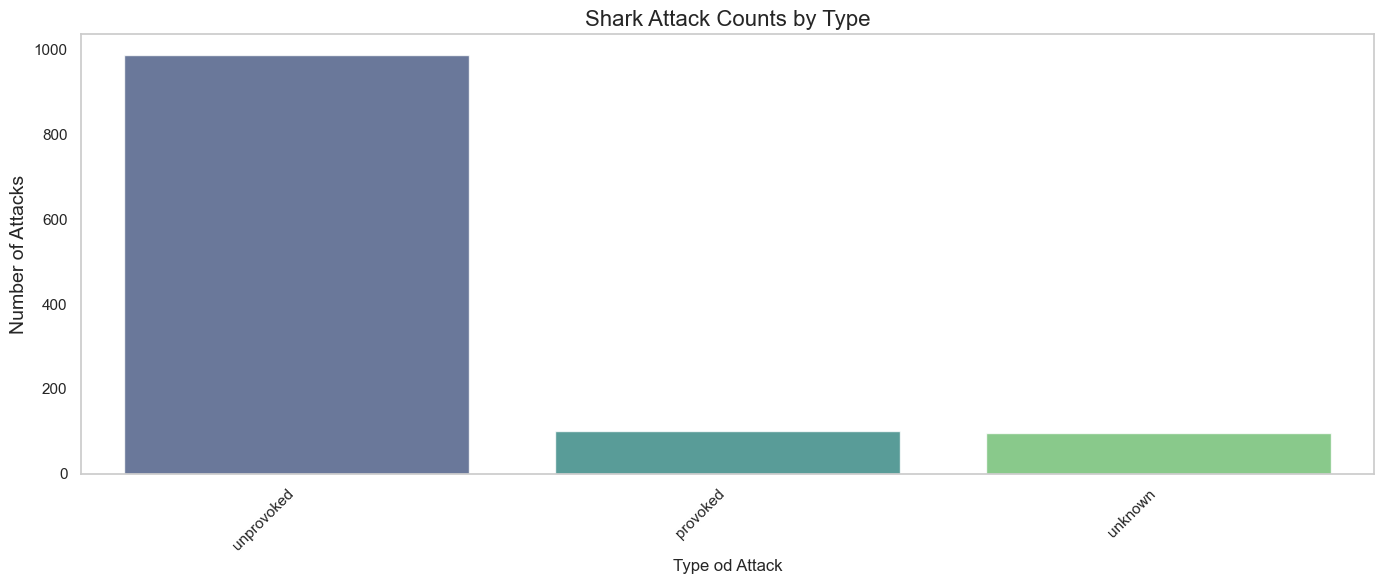

In [12]:
# Ensure the 'type' column is present in the dataframe
if 'type' in df_florida.columns:
    # Set the aesthetics for the plots
    sns.set(style='whitegrid')

    # Create a figure with a specific size
    plt.figure(figsize=(14, 6))

    # Count the number of attacks per type
    county_counts = df_florida['type'].value_counts()

    # Plot the bar graph for counties
    sns.barplot(
        x=county_counts.index,
        y=county_counts.values,
        palette='viridis',                # Choose a color palette
        alpha=0.8                         # Set transparency
    )

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add titles and labels
    plt.title('Shark Attack Counts by Type', fontsize=16)
    plt.xlabel('Type od Attack', fontsize=12)
    plt.ylabel('Number of Attacks', fontsize=14)

    # Show gridlines
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The 'type' column is not present in the dataframe.")

C:\Users\VDaub\AppData\Local\Temp\ipykernel_6604\418988889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


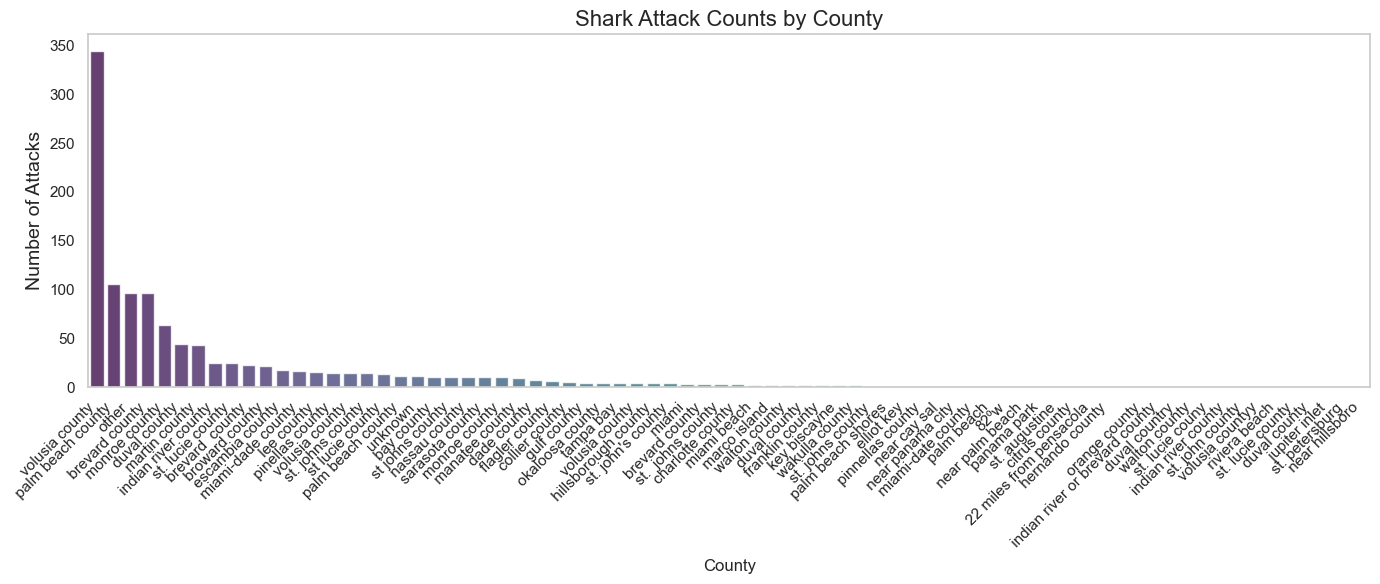

In [13]:
# Ensure the 'county' column is present in the dataframe
if 'county' in df_florida.columns:
    # Set the aesthetics for the plots
    sns.set(style='whitegrid')

    # Create a figure with a specific size
    plt.figure(figsize=(14, 6))

    # Count the number of attacks per county
    county_counts = df_florida['county'].value_counts()

    # Plot the bar graph for counties
    sns.barplot(
        x=county_counts.index,            # X-axis is the county names
        y=county_counts.values,           # Y-axis is the count of attacks
        palette='viridis',                # Choose a color palette
        alpha=0.8                         # Set transparency
    )

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add titles and labels
    plt.title('Shark Attack Counts by County', fontsize=16)
    plt.xlabel('County', fontsize=12)
    plt.ylabel('Number of Attacks', fontsize=14)

    # Show gridlines
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The 'county' column is not present in the dataframe.")

C:\Users\VDaub\AppData\Local\Temp\ipykernel_6604\3376579738.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


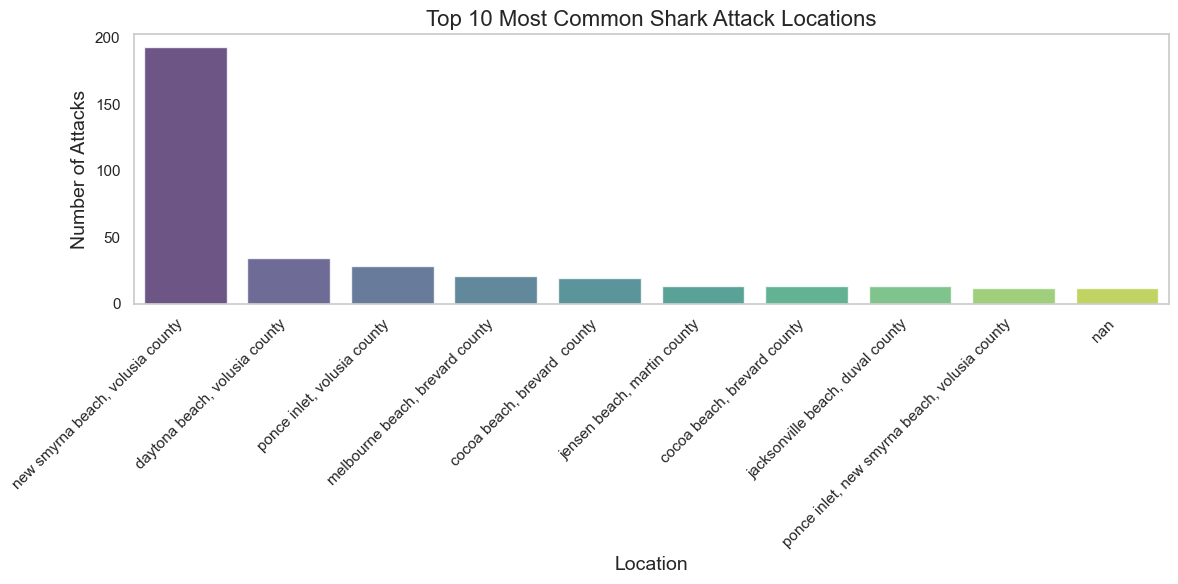

In [14]:
# Ensure the 'location' column is present in the dataframe
if 'location' in df_florida.columns:
    # Set the aesthetics for the plots
    sns.set(style='whitegrid')

    # Create a figure with a specific size
    plt.figure(figsize=(12, 6))

    # Count the number of attacks per location and get the top 10
    top_locations = df_florida['location'].value_counts().nlargest(10)

    # Plot the bar graph for the top 10 locations
    sns.barplot(
        x=top_locations.index,           # X-axis is the top location names
        y=top_locations.values,          # Y-axis is the count of attacks
        palette='viridis',               # Choose a color palette
        alpha=0.8                        # Set transparency
    )

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add titles and labels
    plt.title('Top 10 Most Common Shark Attack Locations', fontsize=16)
    plt.xlabel('Location', fontsize=14)
    plt.ylabel('Number of Attacks', fontsize=14)

    # Show gridlines
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The 'location' column is not present in the dataframe.")

C:\Users\VDaub\AppData\Local\Temp\ipykernel_6604\1224903045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


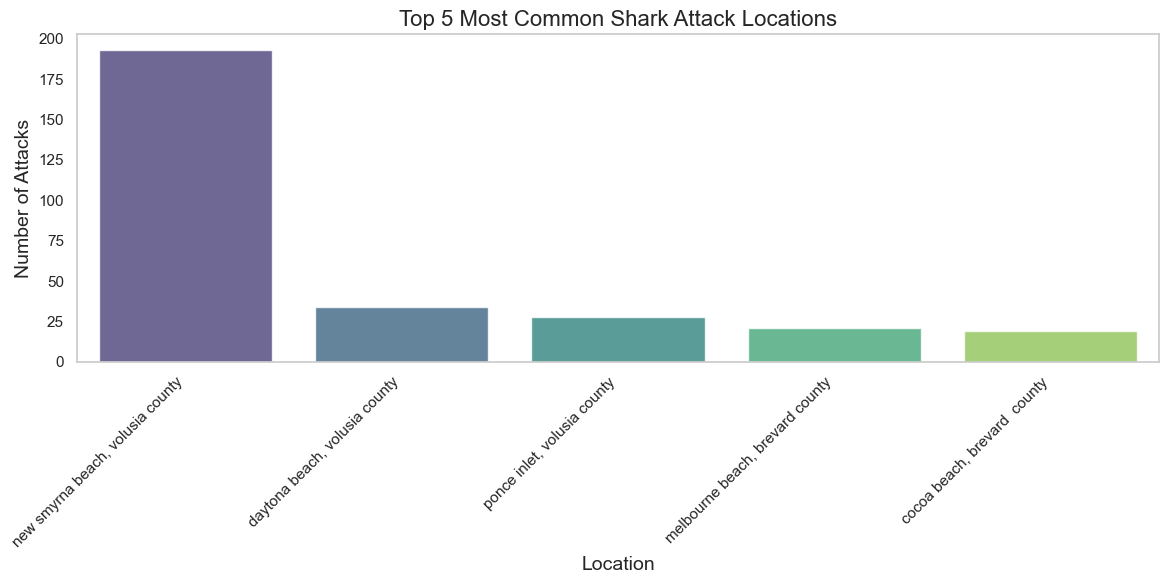

In [15]:
# Ensure the 'location' column is present in the dataframe
if 'location' in df_florida.columns:
    # Set the aesthetics for the plots
    sns.set(style='whitegrid')

    # Create a figure with a specific size
    plt.figure(figsize=(12, 6))

    # Count the number of attacks per location and get the top 5
    top_locations = df_florida['location'].value_counts().nlargest(5)

    # Plot the bar graph for the top 5 locations
    sns.barplot(
        x=top_locations.index,           # X-axis is the top location names
        y=top_locations.values,          # Y-axis is the count of attacks
        palette='viridis',               # Choose a color palette
        alpha=0.8                        # Set transparency
    )

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add titles and labels
    plt.title('Top 5 Most Common Shark Attack Locations', fontsize=16)
    plt.xlabel('Location', fontsize=14)
    plt.ylabel('Number of Attacks', fontsize=14)

    # Show gridlines
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The 'location' column is not present in the dataframe.")

C:\Users\VDaub\AppData\Local\Temp\ipykernel_6604\146517035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


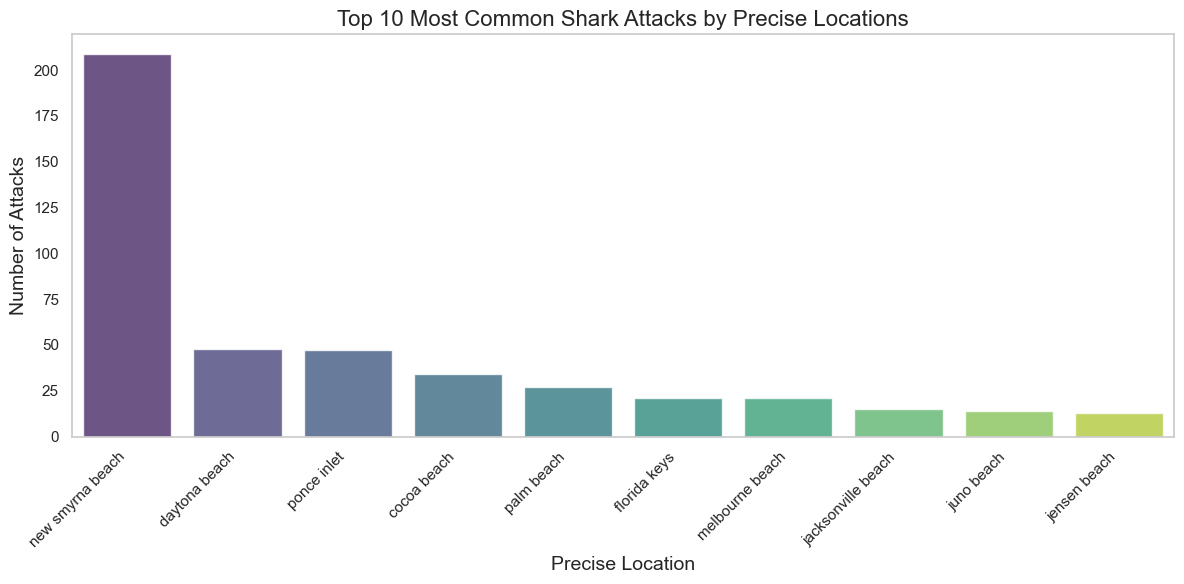

In [16]:
# Ensure the 'precise_location' column is present in the dataframe
if 'precise_location' in df_florida.columns:
    # Drop rows where 'precise_location' is 'Other'
    df_florida = df_florida[df_florida['precise_location'] != 'other']

    # Set the aesthetics for the plots
    sns.set(style='whitegrid')

    # Create a figure with a specific size
    plt.figure(figsize=(12, 6))

    # Count the number of attacks per location and get the top 10
    top_locations = df_florida['precise_location'].value_counts().nlargest(10)

    # Plot the bar graph for the top 10 locations
    sns.barplot(
        x=top_locations.index,
        y=top_locations.values,          # Y-axis is the count of attacks
        palette='viridis',               # Choose a color palette
        alpha=0.8                        # Set transparency
    )

    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add titles and labels
    plt.title('Top 10 Most Common Shark Attacks by Precise Locations', fontsize=16)
    plt.xlabel('Precise Location', fontsize=14)
    plt.ylabel('Number of Attacks', fontsize=14)

    # Show gridlines
    plt.grid(axis='y')

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
else:
    print("The 'precise_location' column is not present in the dataframe.")


In [17]:
# Ensure the 'age' and 'gender' columns are present in the dataframe
if 'age' in df_florida.columns and 'sex' in df_florida.columns:
    # Group by gender and calculate the median age
    median_age_by_gender = df_florida.groupby('sex')['age'].median().reset_index()

    # Rename the columns for clarity
    median_age_by_gender.columns = ['gender', 'median age']

    # Display the resulting table in a format similar to head()
    print(median_age_by_gender.head())
else:
    print("The 'age' or 'gender' column is not present in the dataframe.")

  gender  median age
0      F        19.0
1      M        21.0


In [38]:
age_sex_group = df_florida.pivot_table(index=['age_group', 'sex'], values='injury', aggfunc='count')
age_sex_group

injury
age_group sex        
Adult     F       105
          M       512
Child     F        43
          M        97
Senior    F         7
          M        19
Teens     F        49
          M       243

In [40]:
df_surfing = df_florida.groupby('activity').get_group('surfing')
activity_type_group = df_surfing.pivot_table(index='type', values='injury', aggfunc='count')
activity_type_group

,injury
type,
provoked,11
unknown,8
unprovoked,424


In [42]:
time_group = df_surfing.pivot_table(index='time', values='injury', aggfunc='count')
time_group

,injury
time,
afternoon,222
morning,77
night,1
unknown,143
